In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ocrlib import slog
from imp import reload
from ocrlib import ocroseg
import webdataset as wds
import scipy.ndimage as ndi
import torchmore

In [3]:
import torch
torch.cuda.is_available()

True

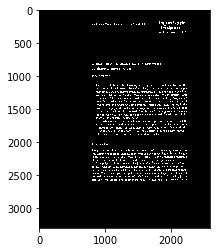

In [4]:
ds = wds.Dataset("uw3/uw3-boxes.tar").decode()
src = iter(ds)
sample = next(src)
page = sample["page.png"]
page = page[:,:,1]
imshow(page)

In [5]:
from ocrlib.ocroseg import Segmenter

torch.Size([1, 1, 1656, 1296])


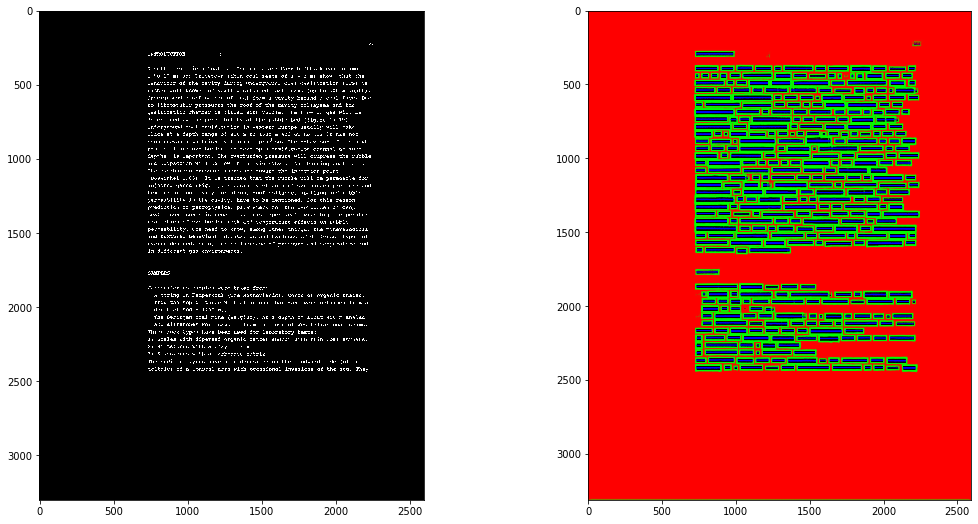

In [6]:
reload(ocroseg)
for i in range(15): next(src)
page = next(src)["page.png"][:,:,1]
segmenter = Segmenter()
segmenter.load_from_save("MODELS/seglstm.pth")
segmenter.segment(page)
figsize(18, 9)
subplot(121); imshow(page)
subplot(122); imshow(segmenter.probs[:,:,:3])

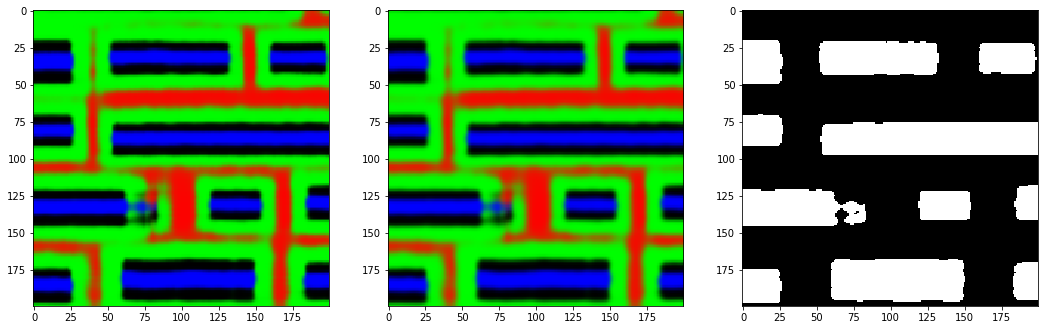

In [7]:
subplot(131); imshow(segmenter.probs[1000:1200, 1000:1200, :3], vmin=0, vmax=1)
subplot(132); imshow(segmenter.gprobs[1000:1200, 1000:1200, :3], vmin=0, vmax=1)
subplot(133); imshow(segmenter.segments[1000:1200, 1000:1200])

torch.Size([1, 1, 1656, 1296])


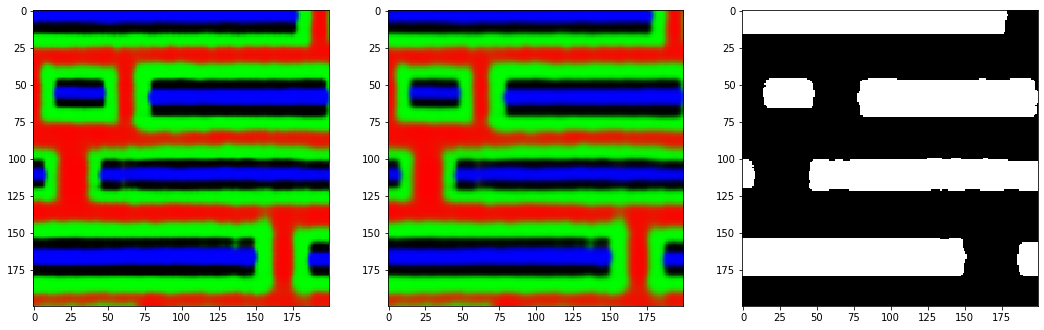

In [8]:
sample = next(src)
page = sample["page.png"][:,:,1]
boxes = segmenter.segment(page)
figsize(18, 9)
subplot(131); imshow(segmenter.probs[1000:1200, 1000:1200, :3], vmin=0, vmax=1)
subplot(132); imshow(segmenter.gprobs[1000:1200, 1000:1200, :3], vmin=0, vmax=1)
subplot(133); imshow(segmenter.segments[1000:1200, 1000:1200])

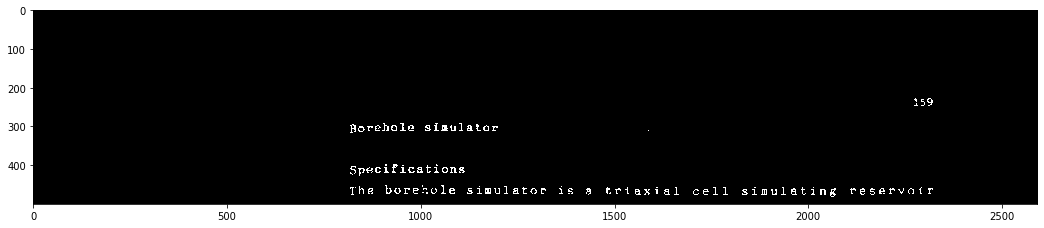

In [9]:
imshow(page[:500])

torch.Size([1, 1, 1656, 1296])


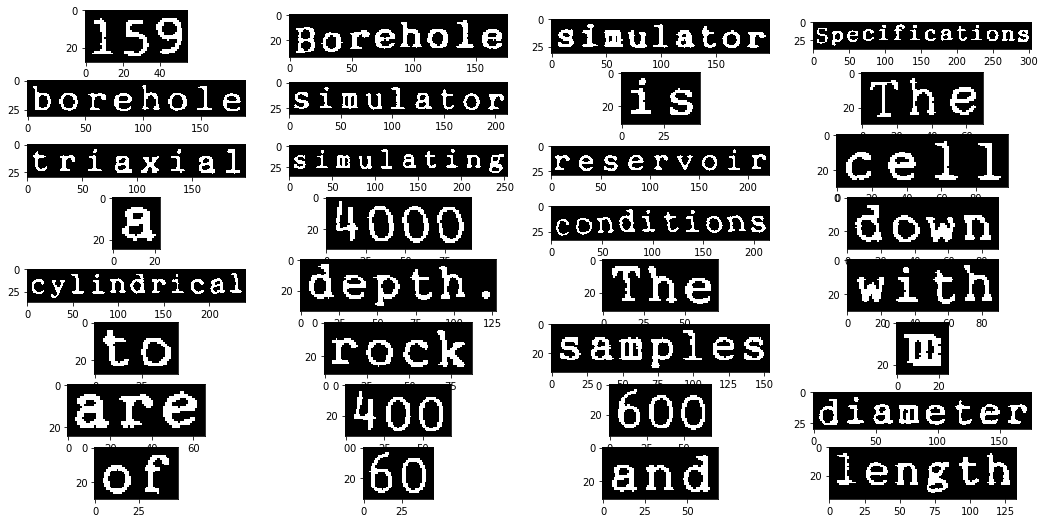

In [10]:
boxes = segmenter.segment(page)
words = ocroseg.extract_boxes(page, boxes)
for i, s in enumerate(words):
    if i>=32: break
    subplot(8, 4, i+1)
    imshow(s)

In [11]:
segmenter.activate(False)

In [12]:
result = torch.load("MODELS/rawlinemodel.pth")
mod = slog.load_module("model", result["msrc"])
model = mod.make_model(96)
model.load_state_dict(result["mstate"])
model.eval();

In [13]:
words = list(ocroseg.extract_boxes(page, boxes))

In [16]:
reload(ocroline)

<module 'ocrlib.ocroline' from '/home/tmb/exp/ocropus4/ocrlib/ocroline.py'>

In [17]:
rec = ocroline.LineRec()

In [18]:
rec.load_from_save("MODELS/linemodel.pth")

torch.Size([1, 1, 1656, 1296])


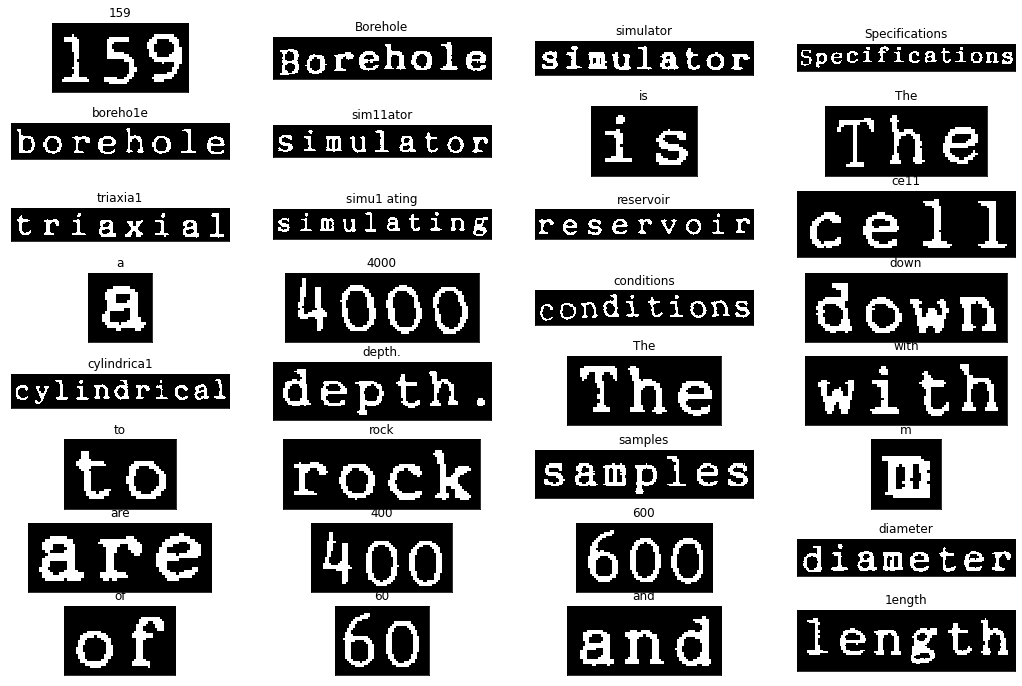

In [19]:
boxes = segmenter.segment(page)
words = ocroseg.extract_boxes(page, boxes)
figsize(18, 12)
for i, s in enumerate(words):
    if i>=32: break
    subplot(8, 4, i+1)
    imshow(s)
    xticks([]); yticks([])
    result = rec.recognize(s)
    title(result)